

# Pandas

1. `DataFrames` y  `Series`
2. Operaciones básicas

`pandas` es una librería que proporciona herramientas analíticas y estructuras de datos con alto rendimiento y facilidad de uso. En particular, la clase `DataFrame` es útil para representación y manipulación de datos heterogéneos tabulados (hojas de cálculo, tabla SQL, etc.)   

## Características
- Ofrece estructuras de datos flexibles y expresivas diseñadas para trabajar con datos tabulados y etiquetados, esta son: `Series` y  `DataFrame`.
- Posee herramientas robustas de lectura/escritura de datos desde ficheros con formatos conocidos como: CSV, XLS. SQL, HDF5, entre otros.
- Permite filtrar, agregar, o eliminar datos.
- Combina las características de las matrices de alto rendimiento de `numpy` con capacidades de manipulación de datos tabulados.

Para importar los módulos de la librería `pandas`, por convención se utiliza:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## DataFrames y Series

Las funcionalidades de `pandas` se basan en dos estructuras de datos fundamentales: *Series* y *DataFrames*.

Una `Series` es un objeto que contiene un `array` unidimensional de datos y un `array` de etiquetas, conocido como *índice*. Si no se especifica un índice o etiqueta, este se genera internamente como una secuencia ordenada de números enteros.

```python
s = pd.Series(data, index=index)
```

Un `DataFrame` es una estructura de datos que almacena datos de forma tabular, es decir, ordenada en filas y columnas etiquetadas. Cada fila (`row`) contiene una observación y cada columna (`column`) una variable. Un `DataFrame` acepta datos heterogéneos, es decir, variables pueden ser de distinto tipo (numérico, string, boolean, etc.). Además de contener datos, un `DataFrame` contiene el nombre de las variables y sus tipos, y métodos que permiten acceder y modificar los datos.

```python
s = pd.DataFrame(data, ...)
```

Las `Series` y `DataFrame` permiten representar datos 1D y 2D. Para representar datos con más dimensiones `pandas` posee otras estructuras de datos más complejas (en fase experimental), llamadas `Panel`, `Panel4D`, `PanelND`. Estas estructuras están fuera del alcance de este curso.



---
# Series en Pandas

## Creación de Series




Crear una Series con índices automáticos a partir de una lista

In [ ]:
serie = pd.Series([1979, 1980, 1981, 1982])
serie

0    1979
1    1980
2    1981
3    1982
dtype: int64



Las `Series` poseen dos atributos: `values`  e `index`. El primero es un `numpy array` que almacena los datos, y el segundo es un objeto que contiene los índices.

In [ ]:
serie.values

array([1979, 1980, 1981, 1982])

In [ ]:
serie.index

RangeIndex(start=0, stop=4, step=1)



Al crear una `Series` se puede definir explícitamente un `array` índice y pasarlo como argumento.



Crear Series con índices definidos

In [ ]:
serie = pd.Series(data=[1979, 1980, 1981, 1982, 1983],
                  index=['carolina', 'martha', 'nicky', 'theresa', 'nicky'])
serie

carolina    1979
martha      1980
nicky       1981
theresa     1982
nicky       1983
dtype: int64



También se pueden crear `Series` a partir de diccionarios, `numpy arrays`, desde ficheros, etc.

Serie a partir de un fichero de datos, se asigna una columna y el squeeze a True convierte el resultado en Series en lugar de Dataframe.

In [ ]:
serie_pokemon = pd.read_csv('pokemon.csv', squeeze=True, usecols=['Name'])
serie_pokemon

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Mega Venusaur
4          Charmander
            ...      
795           Diancie
796      Mega Diancie
797    Hoopa Confined
798     Hoopa Unbound
799         Volcanion
Name: Name, Length: 800, dtype: object



---
## Acceso a datos en Series




El acceso a los datos se puede realizar mediante el índice categórico o el numérico que genera internamente Pandas



Creamos de nuevo la serie inicial

In [ ]:
serie = pd.Series(data=[1979, 1980, 1981, 1982, 1983],
                  index=['carolina', 'martha', 'nicky', 'theresa', 'nicky'])
serie



Indexación mediante etiqueta

In [ ]:
print(serie['martha'])

1980




Indexación mediante índice numérico interno

In [ ]:
print(serie[1])

1980




El índice puede contener valores duplicados

In [ ]:
print(serie['nicky'])

nicky    1981
nicky    1983
dtype: int64




Podemos seleccionar varios valores indicando un intervalo de índices



Recuperamos desde el valor de la posición 1 (el primer elemento tiene un index = 0) hasta el final del índice.

In [ ]:
serie[1:]



Recuperamos los elementos desde la posición 1 a la 2

In [ ]:
serie[1:3]



Podemos usar también índices negativos

In [ ]:
serie[-4:-2]



---
## Métodos en Series



Ordena los valores, por defecto de menos a más.

In [ ]:
serie.sort_values()

carolina    1979
martha      1980
nicky       1981
theresa     1982
nicky       1983
dtype: int64



Ordenamos de forma descendente

In [ ]:
serie.sort_values(ascending=False)

nicky       1983
theresa     1982
nicky       1981
martha      1980
carolina    1979
dtype: int64



Para que los cambios modifique realmente la serie hay que indicarlo mediante el parámetro inplace

In [ ]:
serie_pokemon.sort_values(inplace=True)
serie_pokemon

510                Abomasnow
68                      Abra
392                    Absol
678                 Accelgor
750    Aegislash Blade Forme
               ...          
631                    Zorua
46                     Zubat
695                 Zweilous
794       Zygarde Half Forme
62                       NaN
Name: Name, Length: 800, dtype: object



Si queremos ordernar mediante el índice recurrimos a sort_index()

In [ ]:
serie_pokemon.sort_index()

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Mega Venusaur
4          Charmander
            ...      
795           Diancie
796      Mega Diancie
797    Hoopa Confined
798     Hoopa Unbound
799         Volcanion
Name: Name, Length: 800, dtype: object



Nos devuelve el número de items de cada elemento

In [ ]:
serie_pokemon.value_counts()



---
# Dataframes en Pandas

## Creación de Dataframes

A diferencia de `Series`, los `DataFrame` están diseñados para almacenar datos heterogéneos multivariables. Por ejemplo:



Índice de filas automático

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [ ]:
import numpy as np
import pandas as pd



DataFrame a partir de un diccionario de listas e índice

In [ ]:
df = pd.DataFrame({'nombre': ['Pablo', 'Teresa'],
                   'score': [22.2, 33.3]},
                  index=['id1', 'id2'])
df

,nombre,score
id1,Pablo,22.2
id2,Teresa,33.3




Dataframe a partir fichero

In [ ]:
nba = pd.read_csv('nba.csv')



Se pueden consultar el nombre de las variables usando el atributo `columns`

In [ ]:
nba.columns

Index(['Player', 'height', 'weight', 'collage', 'born', 'birth_city',
       'birth_state'],
      dtype='object')

In [ ]:
nba.head(10)

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana




---
## Acceso a datos en Dataframes




Se pueden extraer columnas de un `DataFrame` con la etiqueta de la columna (sólo si es un identificador Python válido)  usando notación tipo diccionario o como atributo del objeto. En ambos casos se obtiene un objeto tipo `Series`.

In [ ]:
nba['Player']  # dict type

0         Curly Armstrong
1            Cliff Barker
2           Leo Barnhorst
3              Ed Bartels
4             Ralph Beard
              ...        
3917        Troy Williams
3918         Kyle Wiltjer
3919    Stephen Zimmerman
3920          Paul Zipser
3921          Ivica Zubac
Name: Player, Length: 3922, dtype: object

In [ ]:
nba.Player  # attribute type

0         Curly Armstrong
1            Cliff Barker
2           Leo Barnhorst
3              Ed Bartels
4             Ralph Beard
              ...        
3917        Troy Williams
3918         Kyle Wiltjer
3919    Stephen Zimmerman
3920          Paul Zipser
3921          Ivica Zubac
Name: Player, Length: 3922, dtype: object



Mediante la notación de dobles [] obtenemos un Dataframe en lugar de una Serie

In [ ]:
nba[['Player']]

,Player
0,Curly Armstrong
1,Cliff Barker
2,Leo Barnhorst
3,Ed Bartels
4,Ralph Beard
...,...
3917,Troy Williams
3918,Kyle Wiltjer
3919,Stephen Zimmerman
3920,Paul Zipser


In [ ]:
type(nba.Player), type(nba['Player']), type(nba[['Player']])

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)



Podemos recuperar varias columnas a la vez

In [ ]:
nba[['Player','height']]

,Player,height
0,Curly Armstrong,180.0
1,Cliff Barker,188.0
2,Leo Barnhorst,193.0
3,Ed Bartels,196.0
4,Ralph Beard,178.0
...,...,...
3917,Troy Williams,198.0
3918,Kyle Wiltjer,208.0
3919,Stephen Zimmerman,213.0
3920,Paul Zipser,203.0




Para acceder a las filas, se puede usar `loc` o `iloc`.



Permite acceder al contenido de un registro mediante la etiqueta del índice

In [ ]:
df

,nombre,score
id1,Pablo,22.2
id2,Teresa,33.3


In [ ]:
df.loc['id2']

nombre    Teresa
score       33.3
Name: id2, dtype: object



Permite acceder al contenido de un registro mediante la posición del índice

In [ ]:
df.iloc[1]

nombre    Teresa
score       33.3
Name: id2, dtype: object



Podemos acceder a un valor concreto usando el acceso a datos visto anteriormente en Series

In [ ]:
df.iloc[1]['score']

33.3



---
## Métodos en Dataframes


Vemos algunos métodos útiles de la clase Dataframe

In [ ]:
data = pd.read_csv('baseball.csv')



Nos indica el número de columnas y filas del dataframe

In [ ]:
data.shape

(100, 23)

In [ ]:
data.values

array([[88641, 'womacto01', 2006, ..., 3.0, 0.0, 0.0],
       [88643, 'schilcu01', 2006, ..., 0.0, 0.0, 0.0],
       [88645, 'myersmi01', 2006, ..., 0.0, 0.0, 0.0],
       ...,
       [89530, 'ausmubr01', 2007, ..., 4.0, 1.0, 11.0],
       [89533, 'aloumo01', 2007, ..., 0.0, 3.0, 13.0],
       [89534, 'alomasa02', 2007, ..., 0.0, 0.0, 0.0]], dtype=object)



Devuelve los n primeros registros (5 por defecto)

In [ ]:
data.head()

,id,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0




Devuelve los n primeros registros (5 por defecto)

In [ ]:
data.tail(3)

,id,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,1,13,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
99,89534,alomasa02,2007,1,NYN,NL,8,22,1,3,1,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0




Devuelve un resumen estadístico de las variables

In [ ]:
data.describe(include='all')

,id,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.000000,100,100.00000,100.000000,100,100,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
unique,NaN,82,NaN,NaN,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,trachst01,NaN,NaN,NYN,NL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,12,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,89352.660000,NaN,2006.92000,1.130000,NaN,NaN,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,218.910859,NaN,0.27266,0.337998,NaN,NaN,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,88641.000000,NaN,2006.00000,1.000000,NaN,NaN,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,89353.500000,NaN,2007.00000,1.000000,NaN,NaN,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,89399.000000,NaN,2007.00000,1.000000,NaN,NaN,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,89465.250000,NaN,2007.00000,1.000000,NaN,NaN,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000




Devuelve un resumen de la estructura

In [ ]:
data.dtypes

id          int64
player     object
year        int64
stint       int64
team       object
lg         object
g           int64
ab          int64
r           int64
h           int64
X2b         int64
X3b         int64
hr          int64
rbi       float64
sb        float64
cs        float64
bb          int64
so        float64
ibb       float64
hbp       float64
sh        float64
sf        float64
gidp      float64
dtype: object

Devuelve una lista con las etiquetas de las columnas y de las filas

In [ ]:
data.axes

[RangeIndex(start=0, stop=100, step=1),
 Index(['id', 'player', 'year', 'stint', 'team', 'lg', 'g', 'ab', 'r', 'h',
        'X2b', 'X3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh',
        'sf', 'gidp'],
       dtype='object')]



Devuelve el número de elementos únicos por campo

In [ ]:
data.nunique()

id        100
player     82
year        2
stint       2
team       27
lg          2
g          60
ab         63
r          38
h          46
X2b        28
X3b         5
hr         22
rbi        43
sb         12
cs          7
bb         40
so         47
ibb        13
hbp        10
sh         14
sf          9
gidp       17
dtype: int64



# Ejercicios

Considere el siguiente diccionario `data` y lista de `index`

In [ ]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']



- a. Crea un DataFrame a partir del diccionario y los índices.
- b. Selecciona las columnas `animal`y `age`.
- c. Indique cuantos tipos distintos de animales hay.
- d. Indique cuantos animales hay de cada tipo.
- e. Muestre un resumen estadístico de todas las variables.



##### Procesamiento

###### **Group By**

Cualquier operación groupby implica una de las siguientes operaciones en el objeto original. ellos son -

* Dividir el objeto
* Aplicar una función
* Combinando los resultados

En muchas situaciones, dividimos los datos en conjuntos y aplicamos alguna funcionalidad en cada subconjunto. En la funcionalidad de aplicación, podemos realizar las siguientes operaciones:

* Agregación : cálculo de una estadística de resumen
* Transformación : realizar alguna operación específica del grupo
* Filtración : descartar los datos con alguna condición.

Ahora creemos un objeto DataFrame y realicemos todas las operaciones en él:

In [2]:
#import the pandas library
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690


**Dividir datos en grupos**

El objeto Pandas se puede dividir en cualquiera de sus objetos. Hay varias formas de dividir un objeto como:

* obj.groupby('clave')
* obj.groupby(['clave1','clave2'])
* obj.groupby(clave,eje=1)

Veamos ahora cómo se pueden aplicar los objetos de agrupación al objeto DataFram

In [5]:
# import the pandas library
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df.groupby('Team').groups)

{'Devils': [2, 3], 'Kings': [4, 6, 7], 'Riders': [0, 1, 8, 11], 'Royals': [9, 10], 'kings': [5]}


**Agrupar por con múltiples columnas**

In [7]:
# import the pandas library
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df.groupby(['Team','Year']).groups)

{('Devils', 2014): [2], ('Devils', 2015): [3], ('Kings', 2014): [4], ('Kings', 2016): [6], ('Kings', 2017): [7], ('Riders', 2014): [0], ('Riders', 2015): [1], ('Riders', 2016): [8], ('Riders', 2017): [11], ('Royals', 2014): [9], ('Royals', 2015): [10], ('kings', 2015): [5]}


**Iterando a través de Grupos**
Con el objeto groupby en la mano, podemos iterar a través del objeto de forma similar a itertools.obj.

In [8]:
# import the pandas library
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Year')

for name,group in grouped:
   print(name)
   print(group)

2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690


**Seleccione un grupo**
Usando el método get_group() , podemos seleccionar un solo grupo.

In [11]:
# import the pandas library
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Year')
print (grouped.get_group(2014))

     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701 <class 'pandas.core.frame.DataFrame'>


Aplicar múltiples funciones de agregación a la vez
Con Series agrupadas, también puede pasar una lista o dictado de funciones para hacer agregaciones y generar DataFrame como salida:

In [12]:
# import the pandas library
import pandas as pd
import numpy as np

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Team')
print (grouped['Points'].agg([np.sum, np.mean, np.std]))

         sum        mean         std
Team                                
Devils  1536  768.000000  134.350288
Kings   2285  761.666667   24.006943
Riders  3049  762.250000   88.567771
Royals  1505  752.500000   72.831998
kings    812  812.000000         NaN


###### **Merging/Joining**
Pandas tiene operaciones de unión en memoria de alto rendimiento y con todas las funciones, idiomáticamente muy similares a las bases de datos relacionales como SQL.

Pandas proporciona una sola función, merge , como punto de entrada para todas las operaciones estándar de combinación de bases de datos entre objetos DataFrame:

<code>
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)
</code> 

Aquí, hemos utilizado los siguientes parámetros:

* **left** : un objeto DataFrame.

* **Right** − Otro objeto DataFrame.

* **on** − Columnas (nombres) para unirse. Debe encontrarse en los objetos DataFrame izquierdo y derecho.

* **left_on** : columnas del marco de datos izquierdo para usar como claves. Pueden ser nombres de columna o matrices con una longitud igual a la longitud del DataFrame.

* **right_on** : columnas del DataFrame derecho para usar como claves. Pueden ser nombres de columna o matrices con una longitud igual a la longitud del DataFrame.

* **left_index** : si es verdadero, use el índice (etiquetas de fila) del marco de datos izquierdo como su(s) clave(s) de unión. En el caso de un DataFrame con MultiIndex (jerárquico), el número de niveles debe coincidir con el número de claves de combinación del DataFrame derecho.

* **right_index** : el mismo uso que left_index para el DataFrame derecho.

* **how** − Uno de 'izquierda', 'derecha', 'exterior', 'interior'. El valor predeterminado es interior. Cada método se ha descrito a continuación.

* **sort** − Ordena el DataFrame resultante por las claves de combinación en orden lexicográfico. El valor predeterminado es Verdadero, el establecimiento en Falso mejorará sustancialmente el rendimiento en muchos casos.

Ahora vamos a crear dos DataFrames diferentes y realizar las operaciones de fusión en ellos.

In [13]:
# import the pandas library
import pandas as pd
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
   {'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print(right)

   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5
   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5


In [15]:
#Merge Two DataFrames on a Key
import pandas as pd
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print (pd.merge(left,right,on='id'))

   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5


**Fusionar usando el argumento 'how'**
El argumento how para fusionar especifica cómo determinar qué claves se incluirán en la tabla resultante. Si una combinación de teclas no aparece en las tablas izquierda o derecha, los valores en la tabla unida serán NA.

Aquí hay un resumen de las opciones de cómo y sus nombres equivalentes de SQL

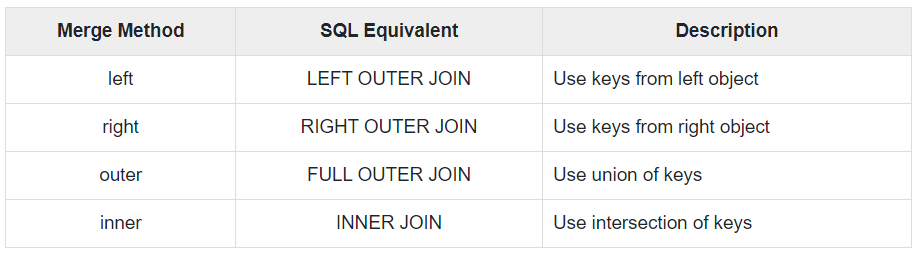

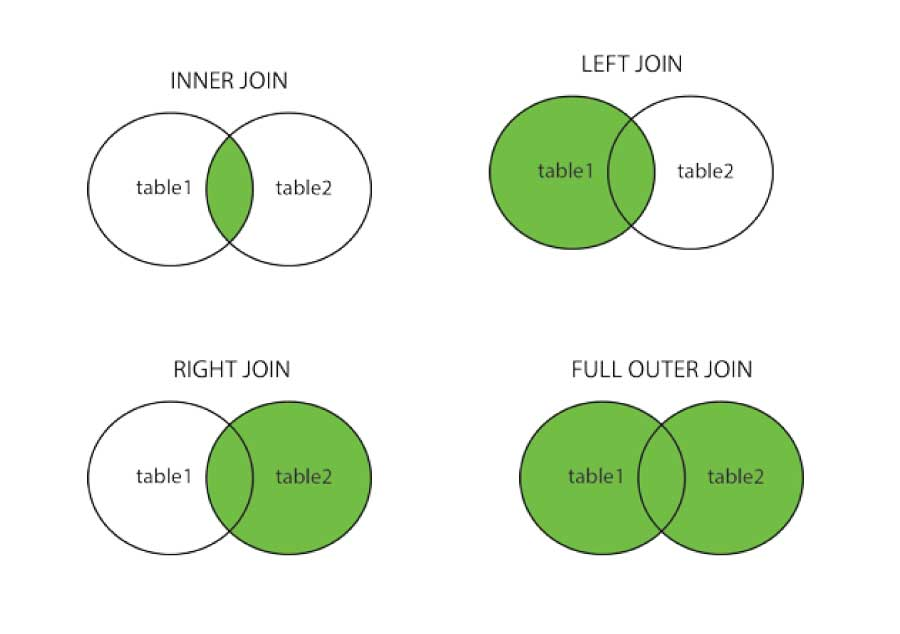

In [17]:
#Left Join
import pandas as pd
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(pd.merge(left, right, on='subject_id', how='left'))

   id_x  Name_x subject_id  id_y Name_y
0     1    Alex       sub1   NaN    NaN
1     2     Amy       sub2   1.0  Billy
2     3   Allen       sub4   2.0  Brian
3     4   Alice       sub6   4.0  Bryce
4     5  Ayoung       sub5   5.0  Betty


In [18]:
#Right Join
import pandas as pd
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print (pd.merge(left, right, on='subject_id', how='right'))

   id_x  Name_x subject_id  id_y Name_y
0   2.0     Amy       sub2     1  Billy
1   3.0   Allen       sub4     2  Brian
2   NaN     NaN       sub3     3   Bran
3   4.0   Alice       sub6     4  Bryce
4   5.0  Ayoung       sub5     5  Betty


In [19]:
#Outer Join

import pandas as pd
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print (pd.merge(left, right, how='outer', on='subject_id'))

   id_x  Name_x subject_id  id_y Name_y
0   1.0    Alex       sub1   NaN    NaN
1   2.0     Amy       sub2   1.0  Billy
2   3.0   Allen       sub4   2.0  Brian
3   4.0   Alice       sub6   4.0  Bryce
4   5.0  Ayoung       sub5   5.0  Betty
5   NaN     NaN       sub3   3.0   Bran


In [20]:
#Inner Join

import pandas as pd
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(pd.merge(left, right, on='subject_id', how='inner'))

   id_x  Name_x subject_id  id_y Name_y
0     2     Amy       sub2     1  Billy
1     3   Allen       sub4     2  Brian
2     4   Alice       sub6     4  Bryce
3     5  Ayoung       sub5     5  Betty
